In [12]:
import csv
import os
from collections import defaultdict
from collections import Counter
from os import listdir
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
from pattern import comparative
import itertools
import ipywidgets as widgets
from IPython.display import display, clear_output
from os.path import join
import json
from copy import deepcopy

# Tasks
1. Easy: one image from adjective (adj) and one image from antonym (ant). Quuestion: which image is more adj(ant)?

2. Medium: Some adj have more than one ant, then two ant become a set of synonyms (ant-1, ant-2). One image from each ant. Question: which image is more ant-1 (ant-2)? This task is more difficult because the easy task is selectinng from adj-ant and the medium task is selecting from a set of synonyms.

3. Hard: Two images from the same adj. Questions: which images is more adj. This is hardest.

Easy and medium require no human labelling. Hard requires human labelling.

In [2]:
data_path = 'release_dataset/images'

In [3]:
adj_ant = defaultdict(set)
adj_syn = defaultdict(set)
with open('release_dataset/adj_ants.csv', mode ='r') as file:    
    csvFile = csv.reader(file)
    for idx, line in enumerate(csvFile):
        if idx == 0:
            continue
        else:
            line = [i for i in line if i]
            for i in range(len(line)):
                if i == 0:
                    for k in range(1, len(line)):
                        adj_ant[line[i]].add(line[k])
                else:
                    adj_ant[line[i]].add(line[0])
                    if len(line[1:]) > 1:
                        tmp = set(line[1:])
                        tmp.remove(line[1])
                        adj_syn[line[i]].update(tmp)
                    break

In [4]:
adj_syn

defaultdict(set,
            {'grimy': {'dirty'},
             'wet': {'damp', 'muddy'},
             'full': {'cluttered', 'filled'},
             'wilted': {'moldy'},
             'old': {'worn'},
             'new': {'young'},
             'winding': {'bent', 'curved'},
             'foggy': {'cloudy'}})

In [5]:
folders = list(os.scandir(data_path))

In [6]:
all_name = set()
for folder in folders:
    if folder.name == '.DS_Store':
        continue
    all_name.add(folder.name)

# Build easy task

In [7]:
visited = set()
easy_candidates = []
for name in all_name:    
    adj, noun = name.split(" ")
    if adj in adj_ant:
        ant_list = adj_ant[adj]
        for ant in ant_list:
            if f'{ant} {noun}' in all_name and tuple(sorted((adj, ant))) not in visited:
                easy_candidates.append((adj, noun, ant))
                visited.add(tuple(sorted((adj, ant))))

In [8]:
def generate_task(data_path, candidates):
    task = []
    for adj, noun, ant in candidates:
        cand_1 = os.path.join(data_path, f'{adj} {noun}')
        cand_2 = os.path.join(data_path, f'{ant} {noun}')
        for i in list(listdir(cand_1)):
            for k in list(listdir(cand_2)):
                rand_1 = random.randint(0, 1)
                if rand_1 == 0:
                    images = (os.path.join(data_path, f'{adj} {noun}', i), os.path.join(data_path, f'{ant} {noun}', k))
                else:
                    images = (os.path.join(data_path, f'{ant} {noun}', k), os.path.join(data_path, f'{adj} {noun}', i))
                rand_2 = random.randint(0, 1)
                if rand_2 == 0:
                    question = f'Which {noun} is {comparative(adj)}? Answer either Left or Right.'
                else:
                    question = f'Which {noun} is {comparative(ant)}? Answer either Left or Right.'

                if rand_1 == rand_2:
                    answer = 'Left'
                else:
                    answer = 'Right'
                task.append((images, question, answer))
    return task

In [9]:
easy_task = generate_task(data_path, easy_candidates)

In [10]:
len(easy_task)

35912

In [11]:
def test_task(task):
    sample = random.randint(0, len(task))
    images, question, answer = task[sample]
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(mpimg.imread(images[0]))
    axarr[1].imshow(mpimg.imread(images[1]))
    print(question)
    print(answer)
    return images, question, answer

Which salad is more wilted? Answer either Left or Right.
Left


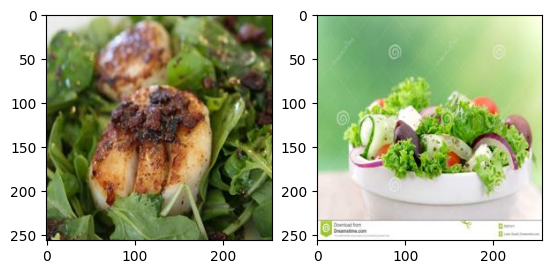

In [81]:
images, question, answer = test_task(easy_task)

In [79]:
images

('release_dataset/images/viscous paste/mastic-lining-500x500.jpg',
 'release_dataset/images/runny paste/508a2639fa5ea93018cb3c2224fce31a.jpg')

In [151]:
with open('easy_task.txt', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(easy_task)

# Build medium task

In [84]:
visited = set()
medium_candidates = []
for name in all_name:    
    adj, noun = name.split(" ")
    if adj in adj_syn:
        syn_list = adj_syn[adj]
        for syn in syn_list:
            if f'{syn} {noun}' in all_name and tuple(sorted((adj, syn))) not in visited:
                medium_candidates.append((adj, noun, syn))
                visited.add(tuple(sorted((adj, syn))))

In [85]:
medium_task = generate_task(data_path, medium_candidates)

Which iguana is newer? Answer either Left or Right.
Left


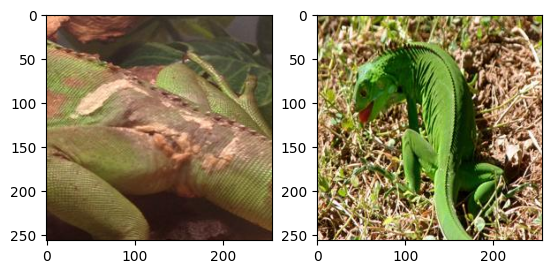

In [143]:
images, question, answer = test_task(medium_task)

In [127]:
images

('release_dataset/images/full bathroom/luxury-full-bathroom.jpg',
 'release_dataset/images/cluttered bathroom/100221ftworthtx4.jpg')

In [152]:
with open('medium_task.txt', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(medium_task)

# Hard task

In [144]:
hard_canndidates = []
for name in all_name: 
    adj, noun = name.split(" ")
    if adj == 'adj':
        continue
    all_data = list(listdir(os.path.join(data_path, name)))
    if len(all_data) < 2:
        continue
    all_comb = list(itertools.combinations(all_data, 2))
    hard_canndidates.append((adj, noun, all_comb))

In [145]:
len(hard_canndidates)

1918

Which desert is more verdant? Answer either Left or Right.
Which sand is muddier? Answer either Left or Right.
Which bronze is more molten? Answer either Left or Right.
Which bread is more caramelized? Answer either Left or Right.
Which salmon is more sliced? Answer either Left or Right.
Which chains is thicker? Answer either Left or Right.
Which shower is straighter? Answer either Left or Right.
Which metal is more brushed? Answer either Left or Right.
Which foam is more whipped? Answer either Left or Right.
Which pizza is more sliced? Answer either Left or Right.
Which potato is more whipped? Answer either Left or Right.
Which ribbon is more crumpled? Answer either Left or Right.
Which tea is more caramelized? Answer either Left or Right.
Which garlic is more diced? Answer either Left or Right.
Which gate is more open? Answer either Left or Right.
Which horse is more windblown? Answer either Left or Right.
Which chocolate is more caramelized? Answer either Left or Right.
Which shoes 

/tmp/ipykernel_51328/1394774349.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, axarr = plt.subplots(1,2)


Which basket is more coiled? Answer either Left or Right.
Which branch is burnter? Answer either Left or Right.
Which lightbulb is larger? Answer either Left or Right.
Which mat is thinner? Answer either Left or Right.
Which tea is moldier? Answer either Left or Right.
Which mat is mossier? Answer either Left or Right.
Which fan is more broken? Answer either Left or Right.
Which building is heavier? Answer either Left or Right.
Which lemon is more diced? Answer either Left or Right.
Which kitchen is larger? Answer either Left or Right.
Which cotton is more ruffled? Answer either Left or Right.
Which paste is runnier? Answer either Left or Right.
Which bathroom is dirtier? Answer either Left or Right.
Which snake is thinner? Answer either Left or Right.
Which boat is more lightweight? Answer either Left or Right.
Which tube is more curved? Answer either Left or Right.
Which lightning is burnter? Answer either Left or Right.
Which pond is muddier? Answer either Left or Right.
Which kitch

Which brass is more coiled? Answer either Left or Right.
Which sword is rustier? Answer either Left or Right.
Which room is dirtier? Answer either Left or Right.
Which ring is thinner? Answer either Left or Right.
Which basket is more folded? Answer either Left or Right.
Which fire is brighter? Answer either Left or Right.
Which concrete is more cored? Answer either Left or Right.
Which shower is more cracked? Answer either Left or Right.
Which canyon is muddier? Answer either Left or Right.
Which knife is benter? Answer either Left or Right.
Which pear is more diced? Answer either Left or Right.
Which concrete is more crushed? Answer either Left or Right.
Which milk is fresher? Answer either Left or Right.
Which flame is brighter? Answer either Left or Right.
Which blade is benter? Answer either Left or Right.
Which car is more broken? Answer either Left or Right.
Which nest is more cluttered? Answer either Left or Right.
Which tower is more painted? Answer either Left or Right.
Which


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x7f0e0badaca0> (for post_execute):



KeyboardInterrupt



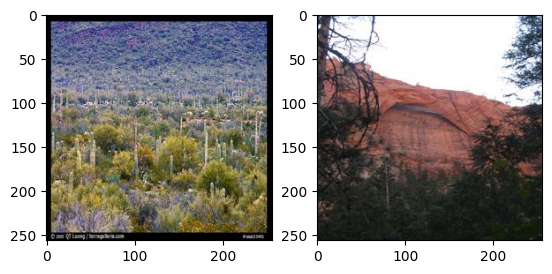

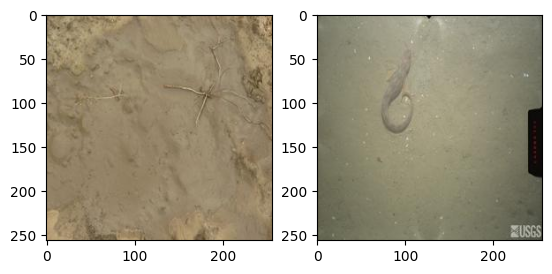

Error in callback <function flush_figures at 0x7f0e0a870700> (for post_execute):



KeyboardInterrupt



In [147]:
for sample in hard_canndidates:
    adj, noun, all_comb = sample
    question = f'Which {noun} is {comparative(adj)}? Answer either Left or Right.'
    for comb in all_comb:
        i_1, i_2 = comb
        f, axarr = plt.subplots(1,2)
        axarr[0].imshow(mpimg.imread(os.path.join(data_path, f'{adj} {noun}', i_1)))
        axarr[1].imshow(mpimg.imread(os.path.join(data_path, f'{adj} {noun}', i_2)))
        print(question)
        break
break

In [148]:
sample = 200
adj, noun, all_comb = hard_canndidates[sample]
question = f'Which {noun} is {comparative(adj)}? Answer either Left or Right.'
# Create two checkboxes
checkbox1 = widgets.Checkbox(description='Left', value=False)
checkbox2 = widgets.Checkbox(description='Right', value=False)

def on_checkbox_change(change):
    if change['owner'].description == 'Left' and change['new'] == True:
        print('Choose Left')
        checkbox2.value = False  # Optionally, uncheck the other checkbox
    elif change['owner'].description == 'Right' and change['new'] == True:
        print('Choose Right')
        checkbox1.value = False  # Optionally, uncheck the other checkbox

# Attach the callback function to the checkboxes
checkbox1.observe(on_checkbox_change, names='value')
checkbox2.observe(on_checkbox_change, names='value')
button = widgets.Button(description="Start label")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    global ix
    global button
    global axarr
    with output:
        ix += 1
        button.description = f"Label index {ix}, next"
        comb = all_comb[ix]
        i_1, i_2 = comb
        clear_output()
#         print(checkbox1.value)
#         print(checkbox2.value)
        f, axarr = plt.subplots(1,2)
        axarr[0].imshow(mpimg.imread(os.path.join(data_path, f'{adj} {noun}', i_1)))
        axarr[1].imshow(mpimg.imread(os.path.join(data_path, f'{adj} {noun}', i_2)))
        plt.show()
        print(question)
        display(checkbox1, checkbox2)
        

ix = 0

button.on_click(on_button_clicked)

Button(description='Start label', style=ButtonStyle())

Output()

# Create label source data

In [2]:
data_path = 'release_dataset/images'
folders = list(os.scandir(data_path))

In [25]:
all_name = []
c = []
for folder in folders:
    tmp = {}
    if folder.name == '.DS_Store':
        continue
    adj, noun = folder.name.split(" ")
    if adj == 'adj':
        continue
    all_data = [join(data_path, folder.name, i) for i in listdir(join(data_path, folder.name))]
    if len(all_data) < 2:
        continue
    question = f'Which {noun} is {comparative(adj)}?'
    tmp['question'] = question
    tmp['images'] = all_data
    tmp['folder'] = folder.name
    c.append(len(all_data))
    all_name.append(tmp)

In [29]:
newlist = sorted(all_name, key=lambda d: len(d['images']))

In [30]:
newlist[:2]

[{'question': 'Which wave is straighter?',
  'images': ['release_dataset/images/straight wave/straight%20wave%20closure-600x896.4.jpg',
   'release_dataset/images/straight wave/image-2.jpg'],
  'folder': 'straight wave'},
 {'question': 'Which bush is more verdant?',
  'images': ['release_dataset/images/verdant bush/Leopard+cubs-.jpg',
   'release_dataset/images/verdant bush/24.jpg'],
  'folder': 'verdant bush'}]

In [32]:
with open('state_transform_source.json', 'w') as fout:
    json.dump(newlist, fout)

In [33]:
len(newlist)

1918

In [26]:
from collections import Counter

In [27]:
Counter(c)

Counter({32: 48,
         35: 58,
         29: 37,
         43: 69,
         31: 53,
         40: 62,
         30: 41,
         2: 42,
         38: 66,
         25: 34,
         17: 23,
         45: 63,
         28: 43,
         39: 50,
         4: 32,
         36: 64,
         49: 7,
         37: 65,
         6: 32,
         20: 31,
         34: 33,
         10: 24,
         46: 34,
         8: 30,
         13: 25,
         11: 34,
         48: 25,
         24: 34,
         44: 74,
         21: 30,
         41: 62,
         22: 38,
         18: 24,
         5: 37,
         23: 28,
         33: 50,
         3: 44,
         15: 31,
         9: 28,
         42: 56,
         14: 32,
         12: 34,
         27: 36,
         47: 34,
         7: 25,
         19: 30,
         26: 35,
         16: 28,
         50: 3})